3D to 2D Projection



Generate 3D Dataset

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
mean = [0, 0, 0]
cov = [[3, 1, 1],
       [1, 2, 0.5],
       [1, 0.5, 1]]

data = np.random.multivariate_normal(mean, cov, 200)

Center the Data

Subtract the mean of each dimension to center the dataset.

In [31]:
mean_vec = np.mean(data, axis=0)
data_centered = data - mean_vec

Compute the Covariance Matrix

This captures how each pair of variables varies together.

In [32]:
cov_matrix = np.cov(data_centered, rowvar=False)

Find Eigenvalues and Eigenvectors

In [33]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

Select the Top Two Principal Components

Sort eigenvectors by descending eigenvalues (importance)

In [34]:
idx = np.argsort(eigenvalues)[::-1]
top2_eigenvectors = eigenvectors[:, idx[:2]]

Project the Data onto the New 2D Space

Use matrix multiplication to get the 2D projection

In [35]:
projected_data = np.dot(data_centered, top2_eigenvectors)

Visualize

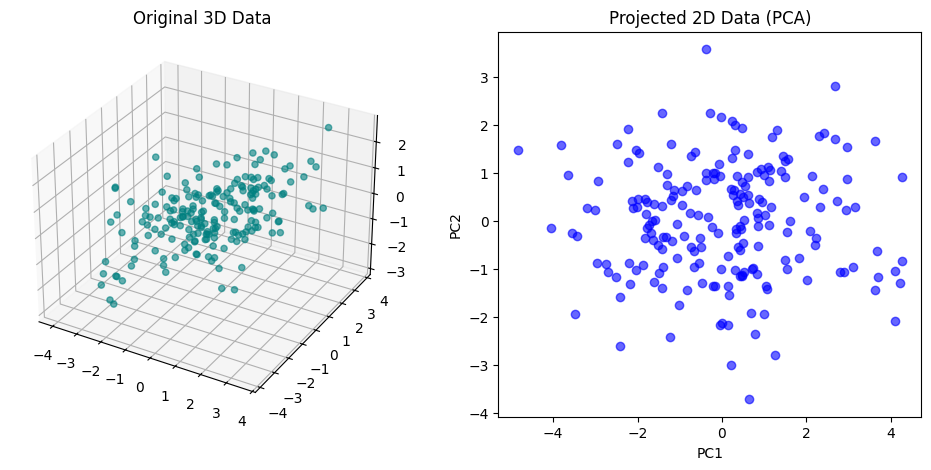

In [36]:
# Original 3D data
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c='teal', alpha=0.6)
ax.set_title("Original 3D Data")

# Projected 2D data
plt.subplot(1,2,2)
plt.scatter(projected_data[:,0], projected_data[:,1], c='b', alpha=0.6)
plt.title("Projected 2D Data (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()